####**IMPORT** **LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

###**IMPORT DATASET**

In [ ]:
df = pd.read_csv('Dataset .csv')
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

###**SPLITTING INTO TRAIN AND TEST**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###**DEFINING NUMERICAL AND CATAGORICAL**

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

###**SPLITTING AFTER PROCESSING**

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

###**Define the Decision Tree Regressor**

In [ ]:
regressor = DecisionTreeRegressor()
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])


###**FIT MODEL AND MAKE PREDICTIONS**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04955520669806383
R-squared: 0.9782281046693965


###**Feature Importance**

In [ ]:

feature_importances = model.named_steps['regressor'].feature_importances_
print(feature_importances)

[2.17446614e-03 2.84705528e-05 1.38064663e-03 ... 0.00000000e+00
 2.21975492e-02 2.57998426e-03]


In [ ]:
print("Number of original features:", len(X.columns))
print("Number of features after one-hot encoding:", X_train_preprocessed.shape[1])


Number of original features: 20
Number of features after one-hot encoding: 17178


In [ ]:
print("Feature names used for plotting decision tree:")
print(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

Feature names used for plotting decision tree:
['x0_#45' 'x0_#Dilliwaala6' 'x0_#InstaFreeze' ... 'x12_Not rated'
 'x12_Poor' 'x12_Very Good']


In [ ]:
original_feature_names = list(X.columns)

# Get feature names after one-hot encoding
one_hot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# Create new feature names by combining original feature names with one-hot encoding categories
new_feature_names = original_feature_names + list(one_hot_feature_names)

###**Visualizing the Decision Tree**

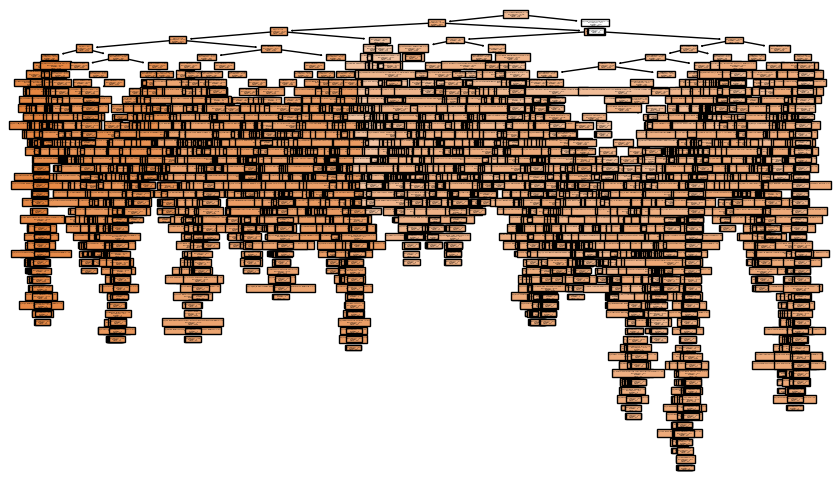

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(model.named_steps['regressor'], feature_names=new_feature_names, filled=True)
plt.show()

###**Analyzing Feature Importance**

In [ ]:
# Combine feature names for numerical and one-hot encoded categorical features
feature_names = list(X.select_dtypes(include=['int64', 'float64']).columns) + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                                                 Feature    Importance
17170                                          x11_White  8.966539e-01
17172                                        x12_Average  5.152611e-02
17176                                           x12_Poor  2.219755e-02
17174                                           x12_Good  1.308405e-02
17177                                      x12_Very Good  2.579984e-03
...                                                  ...           ...
5885                                              x0_WTF  0.000000e+00
5886                           x0_WTF - What's the Food?  0.000000e+00
12865  x2_Shop 5-6, Parmananda Chowk, Kingsway Camp, ... -2.017661e-19
13676                                      x3_Durga Puri -2.017661e-19
17097                       x5_Street Food, North Indian -1.614129e-18

[17178 rows x 2 columns]


###**Analyze Correlation with Target**

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['Aggregate rating'].sort_values(ascending=False))

Aggregate rating        1.000000
Price range             0.437944
Votes                   0.313691
Country Code            0.282189
Average Cost for two    0.051792
Latitude                0.000516
Longitude              -0.116818
Restaurant ID          -0.326212
Name: Aggregate rating, dtype: float64


<ipython-input-25-c140560cd1d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
